In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
tickers = ('3315.T', '5011.T', '5017.T', '5019.T', '5020.T', '5021.T')

In [4]:
df = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    data = pdr.get_data_yahoo(ticker,start = '2006-01-01',end='2024-09-09')['Adj Close']
    data.name = ticker
    df = pd.concat([df,data],axis = 1)



3315.T


[*********************100%%**********************]  1 of 1 completed


5011.T


[*********************100%%**********************]  1 of 1 completed


5017.T


[*********************100%%**********************]  1 of 1 completed


5019.T


[*********************100%%**********************]  1 of 1 completed


5020.T


[*********************100%%**********************]  1 of 1 completed


5021.T


[*********************100%%**********************]  1 of 1 completed


In [6]:
for i in np.arange(len(df.index)):
    df.index.values[i] = str(df.index[i].date())

df.index = df.index.rename('Date')

In [7]:
df.head()

,3315.T,5011.T,5017.T,5019.T,5020.T,5021.T
Date,,,,,,
2006-01-02,242.901154,305.658234,1425.576904,NaN,542.606873,NaN
2006-01-03,242.901154,305.658234,1425.576904,NaN,542.606873,NaN
2006-01-04,256.663300,311.358185,1432.270020,NaN,557.432434,NaN
2006-01-05,273.177795,314.208069,1412.191284,NaN,559.211182,NaN
2006-01-06,260.103882,314.920593,1408.844727,NaN,546.165039,NaN


In [8]:
from scipy.stats import kurtosis, skew
def calculate_returns(prices):
    return (prices / prices.shift(1) - 1) * 100

def analyze_returns(returns):
    mean = np.mean(returns)
    std_dev = np.std(returns)
    skewness = skew(returns)
    kurt = kurtosis(returns)
    return mean, std_dev, skewness, kurt

In [12]:
df_return = calculate_returns(df)
df_return.dropna(axis=0, how='any', inplace=True)
df_return.head()

,3315.T,5011.T,5017.T,5019.T,5020.T,5021.T
Date,,,,,,
2015-10-02,0.000000,-1.396347,-3.888879,-1.729707,0.022789,-1.125712
2015-10-05,0.990104,0.435720,2.890162,2.750278,2.575196,-1.834278
2015-10-06,0.980388,1.301522,-3.089883,1.070639,2.999349,-1.739692
2015-10-07,0.000000,-2.248399,4.927531,4.661021,3.019833,4.000003
2015-10-08,-0.970870,1.752467,-0.276238,0.050625,0.376892,0.819674


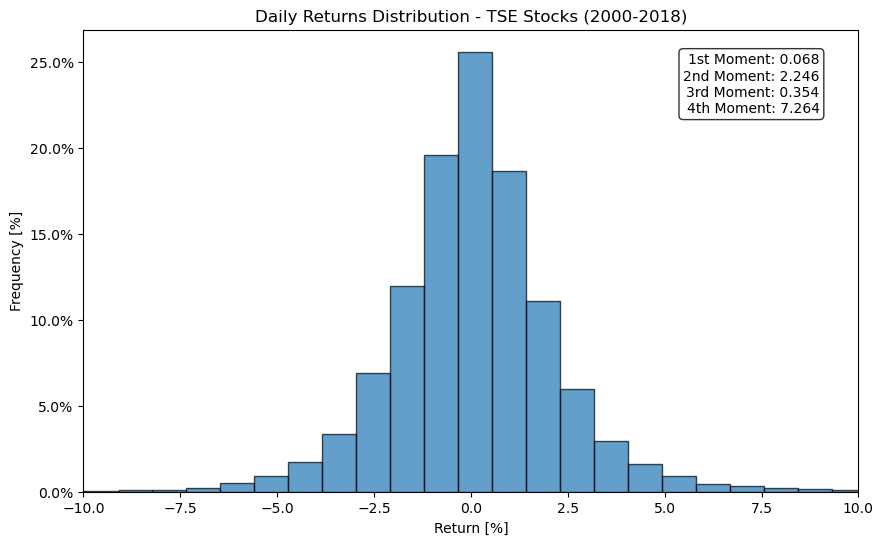

0.06822605682669602
2.2455140135673175
0.3535272738966588
7.264109507840638


In [40]:
from matplotlib.ticker import PercentFormatter

df_return = np.array(df_return)
df_return = df_return.reshape(-1)
ean, std_dev, skewness, kurt = analyze_returns(df_return)

plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(df_return, bins=50, edgecolor='black', alpha=0.7, density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

total_count = len(df_return)
percentage = (n / total_count) * 100

moment_info = f"1st Moment: {mean:.3f}\n2nd Moment: {std_dev:.3f}\n3rd Moment: {skewness:.3f}\n4th Moment: {kurt:.3f}"
plt.text(0.95, 0.95, moment_info, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.title('Daily Returns Distribution - TSE Stocks (2000-2018)')
plt.xlabel('Return [%]')
plt.ylabel('Frequency [%]')


plt.xlim(-10, 10)
plt.show()
print(mean)
print(std_dev)
print(skewness)
print(kurt)

In [75]:
def get_data(tickers):
    df = pd.DataFrame()
    for ticker in tickers:
        print(ticker)
        data = pdr.get_data_yahoo(ticker,start = '2006-01-01',end='2024-09-09')['Adj Close']
        data.name = ticker
        df = pd.concat([df,data],axis = 1)
        
    for i in np.arange(len(df.index)):
        df.index.values[i] = str(df.index[i].date())

    df.index = df.index.rename('Date')
    
    df_return = calculate_returns(df)
    df_return.dropna(axis=0, how='any', inplace=True)
    
    
    df_return = np.array(df_return)
    df_return = df_return.reshape(-1)
    ean, std_dev, skewness, kurt = analyze_returns(df_return)

    plt.figure(figsize=(10, 6))
    n, bins, _ = plt.hist(df_return, bins=50, edgecolor='black', alpha=0.7, density=True)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    total_count = len(df_return)
    percentage = (n / total_count) * 100

    moment_info = f"1st Moment: {mean:.3f}\n2nd Moment: {std_dev:.3f}\n3rd Moment: {skewness:.3f}\n4th Moment: {kurt:.3f}"
    plt.text(0.95, 0.95, moment_info, transform=plt.gca().transAxes, 
             verticalalignment='top', horizontalalignment='right', 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title('Daily Returns Distribution - TSE Stocks (2000-2018)')
    plt.xlabel('Return [%]')
    plt.ylabel('Frequency [%]')


    plt.xlim(-10, 10)
    plt.show()
    print(mean)
    print(std_dev)
    print(skewness)
    print(kurt)
    

In [77]:
oil = ('3315.T', '5011.T', '5017.T', '5019.T', '5020.T', '5021.T')
ele_gas = ('9501.T', '9502.T', '9503.T', '9504.T', '9505.T', '9506.T', '9507.T',
            '9508.T', '9509.T', '9511.T', '9513.T', '9517.T', '9519.T',
              '9531.T', '9532.T', '9533.T', '9534.T', '9535.T', '9536.T',
              '9543.T', '9551.T')

9501.T


[*********************100%%**********************]  1 of 1 completed


9502.T


[*********************100%%**********************]  1 of 1 completed


9503.T


[*********************100%%**********************]  1 of 1 completed


9504.T


[*********************100%%**********************]  1 of 1 completed


9505.T


[*********************100%%**********************]  1 of 1 completed


9506.T


[*********************100%%**********************]  1 of 1 completed


9507.T


[*********************100%%**********************]  1 of 1 completed


9508.T


[*********************100%%**********************]  1 of 1 completed


9509.T


[*********************100%%**********************]  1 of 1 completed


9511.T


[*********************100%%**********************]  1 of 1 completed


9513.T


[*********************100%%**********************]  1 of 1 completed


9517.T


[*********************100%%**********************]  1 of 1 completed


9519.T


[*********************100%%**********************]  1 of 1 completed


9531.T


[*********************100%%**********************]  1 of 1 completed


9532.T


[*********************100%%**********************]  1 of 1 completed


9533.T


[*********************100%%**********************]  1 of 1 completed


9534.T


[*********************100%%**********************]  1 of 1 completed


9535.T


[*********************100%%**********************]  1 of 1 completed


9536.T


[*********************100%%**********************]  1 of 1 completed


9543.T


[*********************100%%**********************]  1 of 1 completed


9551.T


[*********************100%%**********************]  1 of 1 completed


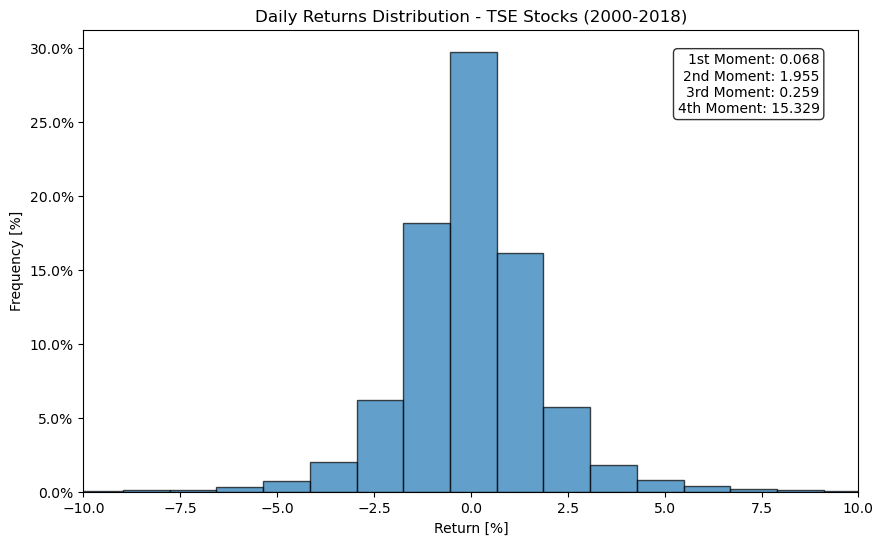

0.06822605682669602
1.9551978025066723
0.2594316865476345
15.328789022206085


In [78]:
get_data(ele_gas)